<a href="https://colab.research.google.com/github/anarghya15/notebooks/blob/main/notebooks/lang_segment_anything_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/luca-medeiros/lang-segment-anything.git

Cloning into 'lang-segment-anything'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 411 (delta 128), reused 99 (delta 99), pack-reused 231 (from 2)
Receiving objects: 100% (411/411), 27.69 MiB | 43.35 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [2]:
%cd /content/lang-segment-anything

/content/lang-segment-anything


In [3]:
!pip install -e .

Obtaining file:///content/lang-segment-anything
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/facebookresearch/segment-anything-2 (to revision c2ec8e14a185632b0a5d8b161928ceb50197eddc) to /tmp/pip-install-6e3rp2ym/sam-2_881e9639be6d4ccb842a4c5ad28305a1
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything-2 /tmp/pip-install-6e3rp2ym/sam-2_881e9639be6d4ccb842a4c5ad28305a1
  Running command git rev-parse -q --verify 'sha^c2ec8e14a185632b0a5d8b161928ceb50197eddc'
  Running command git fetch -q https://github.com/facebookresearch/segment-anything-2 c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Running command git checkout -q c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Resolved https://github.com/facebookresearch/segment-anything-2 to commit c2ec8e14a185

In [1]:
%cd /content/lang-segment-anything

/content/lang-segment-anything


In [3]:
!python app.py

2025-03-05 09:36:41.084107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741167401.348648    3107 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741167401.424552    3107 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 09:36:41.986684: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it r

In [65]:
from PIL import Image
from lang_sam import LangSAM

model = LangSAM()
image_pil = Image.open("./assets/sample06.jpg").convert("RGB")
text_prompt = "yellow sign board."
results = model.predict([image_pil], [text_prompt])

Predicting 1 masks
Predicted 1 masks


In [66]:
results

[{'scores': array([0.45737904], dtype=float32),
  'labels': ['yellow sign board'],
  'boxes': array([[1145.2389 ,  377.1061 , 1397.1847 ,  457.96976]], dtype=float32),
  'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
  'mask_scores': array(0.97265625, dtype=float32)}]

In [67]:
import numpy as np
from lang_sam.utils import draw_image

image_array = np.asarray(image_pil)
results = results[0]

output_image = draw_image(
    image_array,
    results["masks"],
    results["boxes"],
    results["scores"],
    results["labels"],
)
output_image = Image.fromarray(np.uint8(output_image)).convert("RGB")


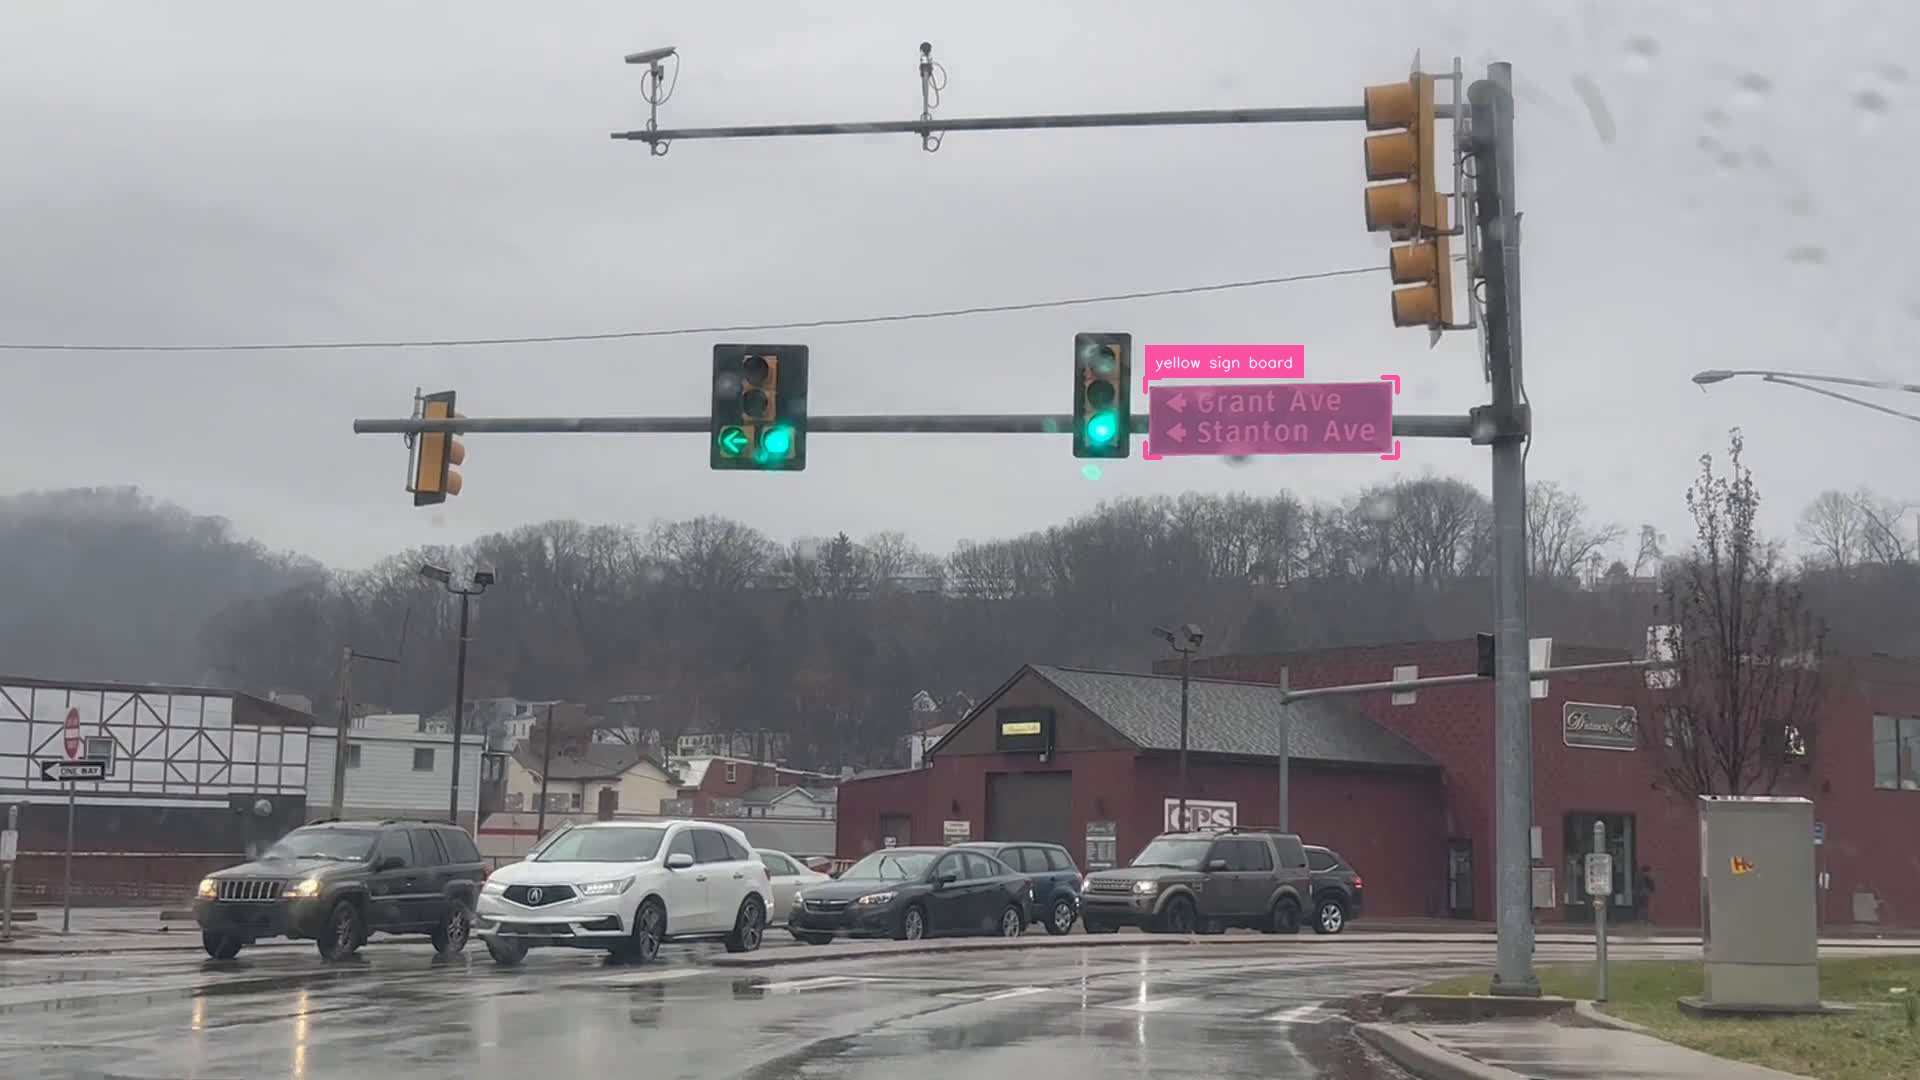

In [68]:
output_image